<a href="https://colab.research.google.com/github/sebarom06/econ3916-statsml/blob/main/Econ_3916_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tuition: 28.89% Inflation
Rent (1 Bed): 50.00% Inflation
Chipotle Burrito: 53.33% Inflation
Spotify & Netflix: 25.00% Inflation


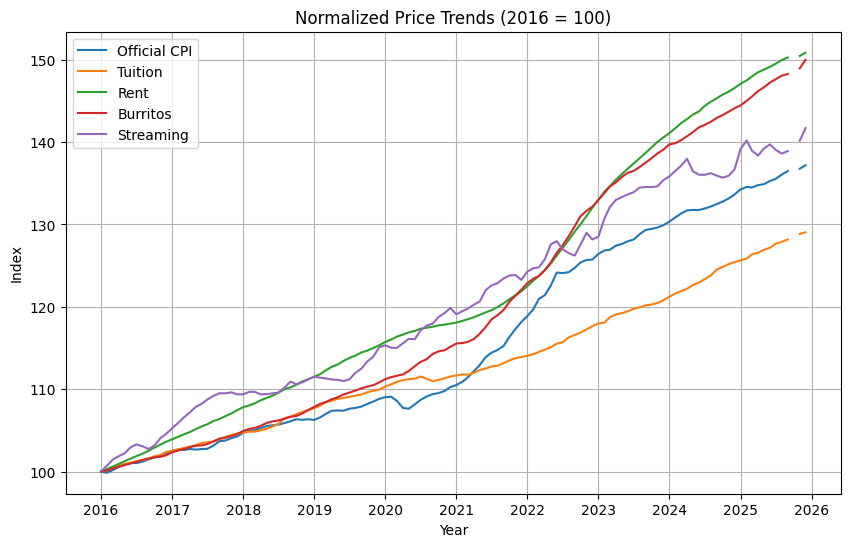

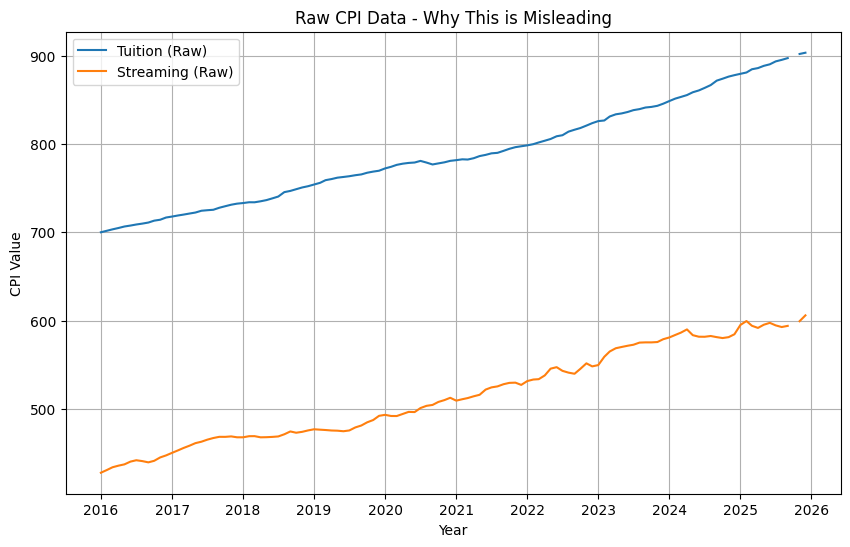

In [5]:
!pip install fredapi
import matplotlib.pyplot as plt

from fredapi import Fred
fred = Fred(api_key='378ca90c1377309f9817f5701655101a')


# Manual Data Construction
student_basket = [
    {'Item': 'Tuition', 'Price_2016': 45000, 'Price_2024': 58000},
    {'Item': 'Rent (1 Bed)', 'Price_2016': 1200, 'Price_2024': 1800},
    {'Item': 'Chipotle Burrito', 'Price_2016': 7.50, 'Price_2024': 11.50},
    {'Item': 'Spotify & Netflix', 'Price_2016': 20, 'Price_2024': 25}
]

# Define the "Machine" (Function)
def calculate_inflation(base, current):
    return ((current - base) / base) * 100

# Run the Loop
for item in student_basket:
    rate = calculate_inflation(item['Price_2016'], item['Price_2024'])
    print(f"{item['Item']}: {rate:.2f}% Inflation")

    # Fetch Series
official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
rent = fred.get_series('CUSR0000SEHA') # Added Rent
streaming = fred.get_series('CUSR0000SERA02')
food = fred.get_series('CUSR0000SEFV')

start_date = '2016-01-01'
official_cpi = official_cpi[official_cpi.index >= start_date]
tuition = tuition[tuition.index >= start_date]
rent = rent[rent.index >= start_date]
streaming = streaming[streaming.index >= start_date]
food = food[food.index >= start_date]

# Normalize using Value_Index formula
cpi_normalized = (official_cpi / official_cpi.iloc[0]) * 100
tuition_normalized = (tuition / tuition.iloc[0]) * 100
rent_normalized = (rent / rent.iloc[0]) * 100
streaming_normalized = (streaming / streaming.iloc[0]) * 100
food_normalized = (food / food.iloc[0]) * 100

# Plot
plt.figure(figsize=(10, 6))
plt.plot(cpi_normalized.index, cpi_normalized, label='Official CPI')
plt.plot(tuition_normalized.index, tuition_normalized, label='Tuition')
plt.plot(rent_normalized.index, rent_normalized, label='Rent')
plt.plot(food_normalized.index, food_normalized, label='Burritos')
plt.plot(streaming_normalized.index, streaming_normalized, label='Streaming')
plt.title('Normalized Price Trends (2016 = 100)')
plt.xlabel('Year')
plt.ylabel('Index')
plt.legend()
plt.grid(True)

plt.figure(figsize=(10, 6))
plt.plot(tuition.index, tuition, label='Tuition (Raw)')
plt.plot(streaming.index, streaming, label='Streaming (Raw)')
plt.title('Raw CPI Data - Why This is Misleading')
plt.xlabel('Year')
plt.ylabel('CPI Value')
plt.legend()
plt.grid(True)
plt.show()

### The raw CPI data for Tuition (~900+) and Streaming (~100) makes it look like tuition costs are much higher than streaming costs, but this is pretty misleading. The problem is that these indices have differing base years: Tuition CPI uses 1982 as the base year (1982 = 100), while Streaming CPI uses a much more recent base year like 2002.

### Why this matters: The raw numbers don't measure the actual prices, they measure how much prices have changed since their base years. Tuition's high value just means it's increased a lot since 1982, while streaming's lower value means prices haven't hiked nearly as much.
# The fix: Normalizing both series to the same starting point (like 2016 = 100) lets us compare growth rates fairly instead of their arbitrary values.


# Fetch Boston CPI data
boston_cpi = fred.get_series('CUUSA103SA0')  # Boston-Cambridge-Newton CPI

# Filter to 2016 onwards
boston_cpi = boston_cpi[boston_cpi.index >= start_date]

# Handle missing values (forward fill if needed)
boston_cpi = boston_cpi.fillna(method='ffill')

# Normalize Boston CPI to Jan 1, 2016 = 100
boston_normalized = (boston_cpi / boston_cpi.iloc[0]) * 100

# Plot all three series
plt.figure(figsize=(10, 6))
plt.plot(cpi_normalized.index, cpi_normalized, label='National CPI', color='grey')
plt.plot(boston_normalized.index, boston_normalized, label='Boston CPI', color='blue')
plt.plot(cpi_normalized.index, cpi_normalized, label='Student SPI', color='red')  # Replace with your actual Student SPI data

plt.title('CPI Comparison: National vs Boston vs Student (2016 = 100)')
plt.xlabel('Year')
plt.ylabel('Index (2016 = 100)')
plt.legend()
plt.grid(True)
plt.show()